# Advanced reading

This section will describe some more advanced methods for reading data files

Most of these methods involve ways to read just a subset of the source data based on spatial attributes


## What is a bounding box and how are they specified?

Lets start by reading in the raptor data again from a shapefile and viewing it as a map

In [1]:
%matplotlib inline
import geopandas as gpd

In [2]:
raptors = gpd.read_file("data/Raptor_Nests.shp")

<Axes: >

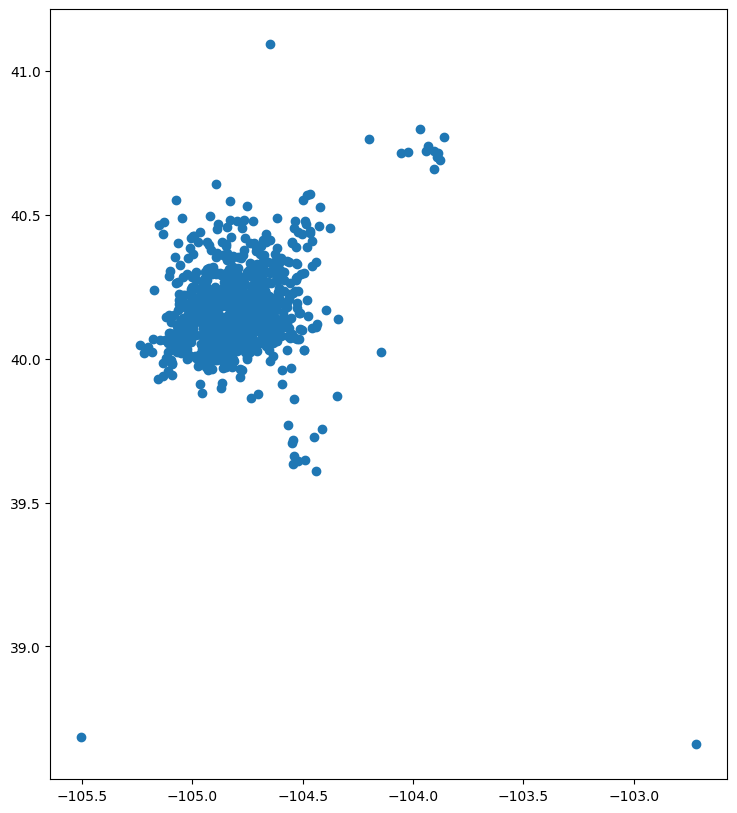

In [3]:
raptors.plot(figsize=(10,10))

Now lets view the bounding box of this dataset

In [4]:
raptors.total_bounds

array([-105.50223,   38.66005, -102.71759,   41.09211])

So we see that in the Fiona/Shapely world bounding boxes are a list or tuple ordered with the lower left x coordinate first, the LL Y coordinate second, the upper right x coordinate third and the UR y coordinate fourth.

Knowing this we can create a tuple called aoi for area of interest. This will serve as the bounding box of the area that we are really interested in and filter out any outlying raptor nests

In [5]:
aoi = (-105.3, 39.5, -103.7, 40.8)

Now we simply use the aoi as the bbox parameter in the GeoPandas read_file method

In [6]:
raptors = gpd.read_file("data/Raptor_Nests.shp", bbox=aoi)

And now if we plot the data we will no longer have the outliers

<Axes: >

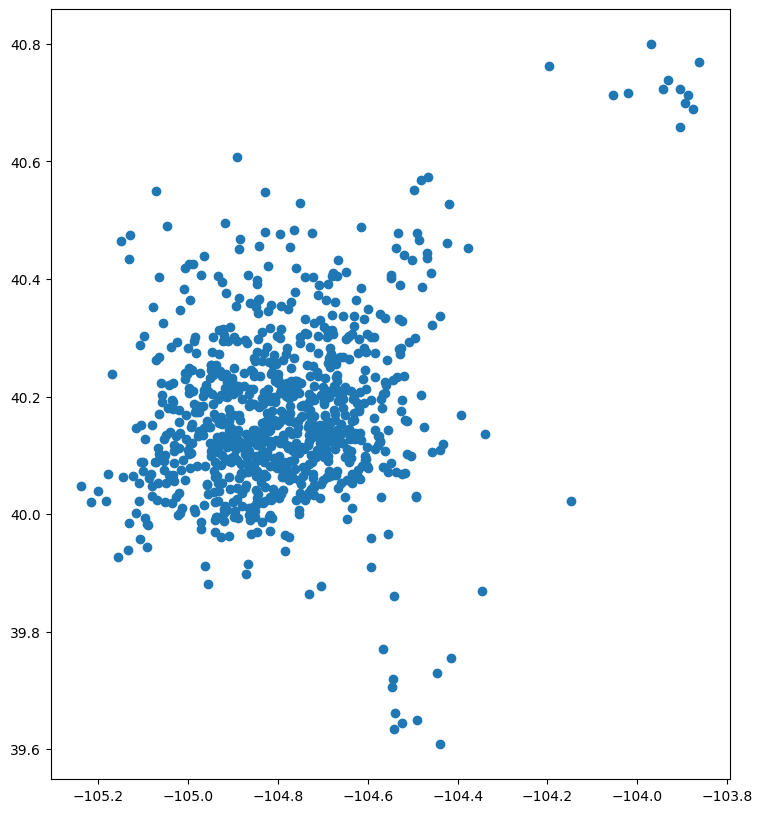

In [7]:
raptors.plot(figsize=(10,10))

Now lets read in a shapefile with the boundaries of all the counties in Colorado

In [8]:
counties = gpd.read_file("data/colorado_counties.shp")

<Axes: >

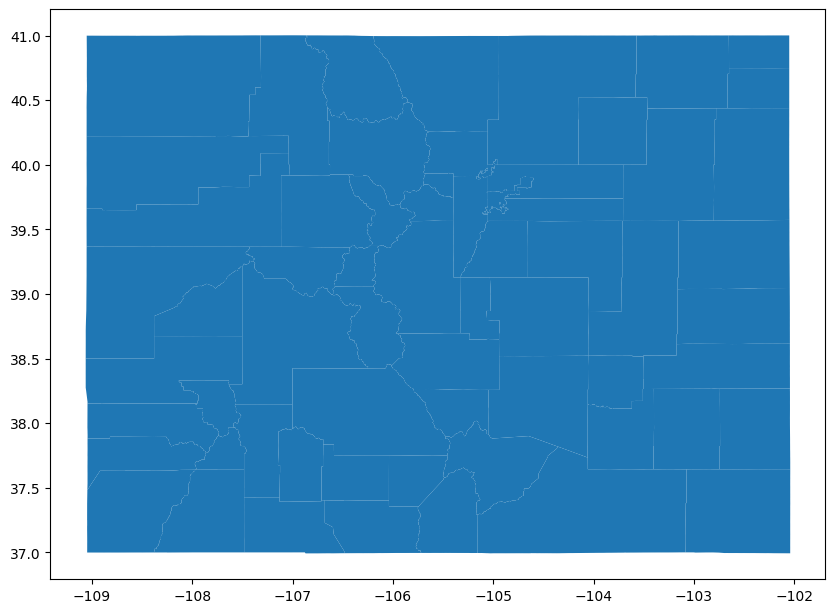

In [9]:
counties.plot(figsize=(10,10))

That looks fine but what if we are only concerned about the counties that contain raptor nests?

It turns out that we can do this a couple ways.  

1) First we could pass the total_bounds of the raptor data frame as the bbox

In [10]:
counties = gpd.read_file("data/colorado_counties.shp", bbox=tuple(raptors.total_bounds))

<Axes: >

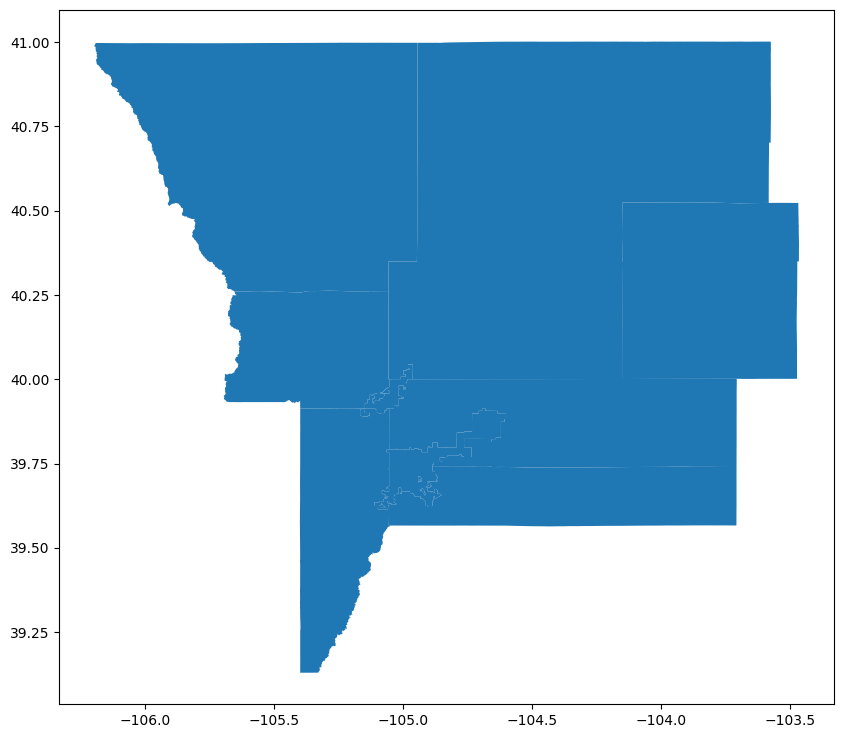

In [11]:
counties.plot(figsize=(10,10))

2) But it turns out you can simply pass the entire GeoDataFrame and GeoPands will know enough to use its total bounds without you having to specify it

In [12]:
counties = gpd.read_file("data/colorado_counties.shp", bbox=raptors)

<Axes: >

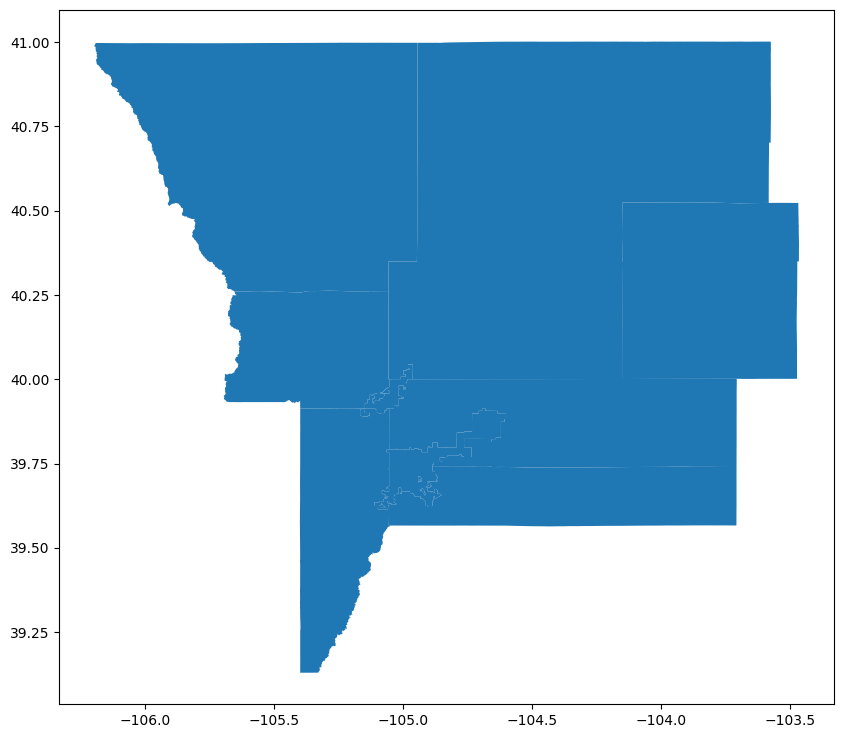

In [13]:
counties.plot(figsize=(10,10))

In [14]:
counties

,OBJECTID,COUNTYFP,Shape_Leng,Shape_Area,low,lowmod,LMMI,lowmoduniv,lowmod_pct,NAMELSAD10,geometry
0,1,001,4.321021,0.322758,132545.0,231255.0,334950.0,467200.0,0.494981,Adams County,"POLYGON ((-103.86177 40.00123, -103.86147 40.0..."
1,3,005,3.713979,0.218916,145159.0,250415.0,371560.0,603745.0,0.414769,Arapahoe County,"MULTIPOLYGON (((-104.90290 39.62418, -104.9040..."
2,7,013,2.383373,0.202535,94520.0,121700.0,167445.0,299850.0,0.405870,Boulder County,"MULTIPOLYGON (((-105.05771 39.97412, -105.0577..."
3,8,014,1.174635,0.009158,9045.0,17315.0,29050.0,60355.0,0.286886,Broomfield County,"MULTIPOLYGON (((-105.09996 39.95799, -105.0999..."
4,17,031,2.744229,0.042103,214070.0,330205.0,441065.0,634420.0,0.520483,Denver County,"MULTIPOLYGON (((-104.93167 39.69917, -104.9316..."
5,31,059,2.862683,0.210185,104434.0,192680.0,300285.0,543700.0,0.354387,Jefferson County,"MULTIPOLYGON (((-105.05431 39.62432, -105.0558..."
6,36,069,3.899824,0.726530,83810.0,134340.0,194105.0,309125.0,0.434581,Larimer County,"POLYGON ((-105.23149 40.99842, -105.22664 40.9..."
7,45,087,2.415281,0.354778,7350.0,13100.0,19145.0,27825.0,0.470800,Morgan County,"POLYGON ((-104.08969 40.52441, -104.07064 40.5..."
8,63,123,5.099761,1.106108,56122.0,100164.0,150579.0,264445.0,0.378771,Weld County,"MULTIPOLYGON (((-104.97628 40.03305, -104.9752..."


In [15]:
broomfield = counties[counties.NAMELSAD10=="Broomfield County"]

<Axes: >

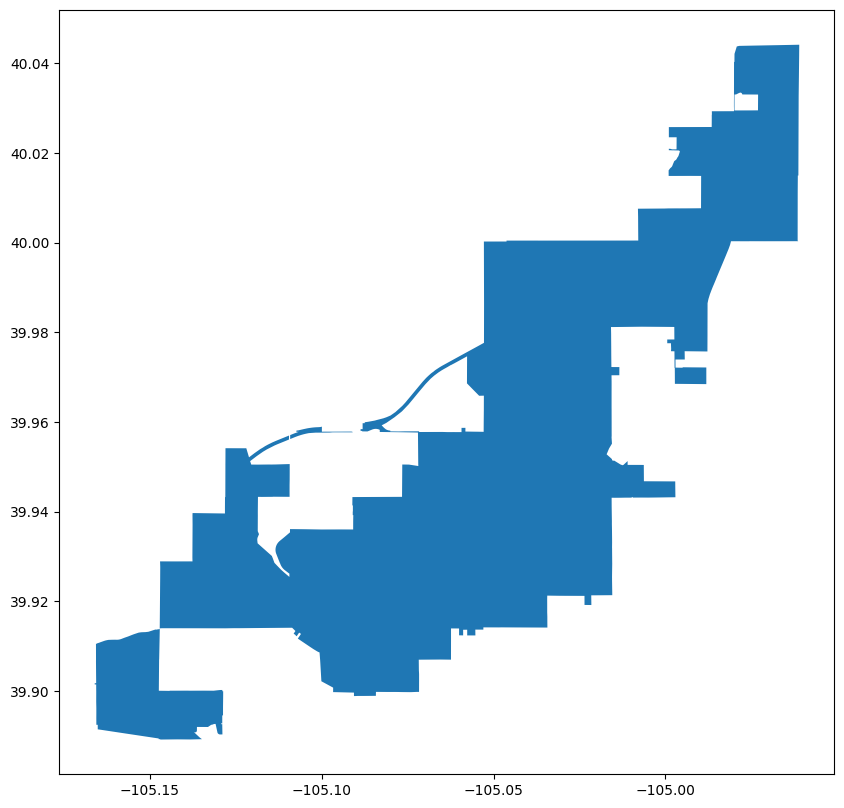

In [16]:
broomfield.plot(figsize=(10,10))

In [17]:
broomfield_nests = gpd.read_file("data/Raptor_Nests.shp", mask=broomfield)

<Axes: >

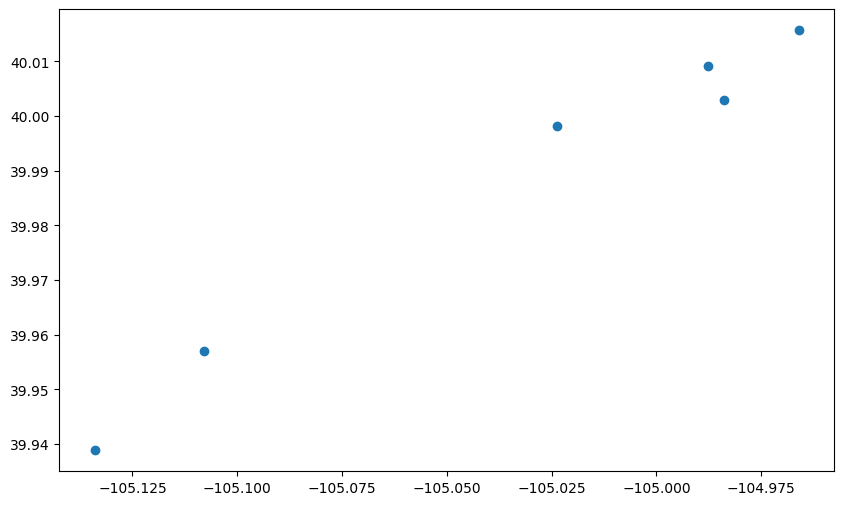

In [18]:
broomfield_nests.plot(figsize=(10,10))

<Axes: >

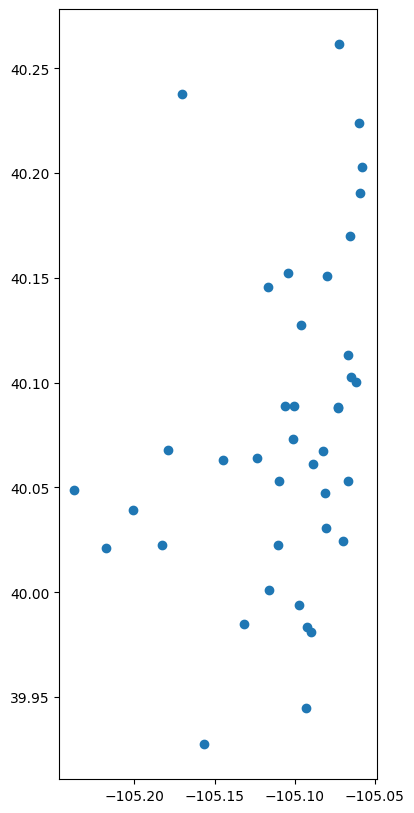

In [19]:
boulder_nests = gpd.read_file("data/Raptor_Nests.shp", mask=counties[counties.NAMELSAD10=="Boulder County"])
boulder_nests.plot(figsize=(10,10))

In [20]:
boulder_nests.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   postgis_fi  40 non-null     int64   
 1   lat_y_dd    40 non-null     float64 
 2   long_x_dd   40 non-null     float64 
 3   lastsurvey  40 non-null     object  
 4   recentspec  40 non-null     object  
 5   recentstat  40 non-null     object  
 6   Nest_ID     40 non-null     int64   
 7   geometry    40 non-null     geometry
dtypes: float64(2), geometry(1), int64(2), object(3)
memory usage: 2.6+ KB


In [21]:
boulder_nests

,postgis_fi,lat_y_dd,long_x_dd,lastsurvey,recentspec,recentstat,Nest_ID,geometry
0,14,40.126690,-105.020896,2011-01-06,Swainsons Hawk,ACTIVE NEST,14,POINT (-105.05943 40.19046)
1,62,40.116947,-105.036532,2008-04-25,Swainsons Hawk,INACTIVE NEST,62,POINT (-105.09585 40.12760)
2,112,40.185024,-105.155517,2008-06-03,Red-tail Hawk,INACTIVE NEST,112,POINT (-105.17062 40.23782)
3,130,40.182479,-105.021958,2009-02-16,Swainsons Hawk,ACTIVE NEST,130,POINT (-105.10449 40.15217)
4,154,40.112500,-105.051913,2009-09-21,Red-tail Hawk,FLEDGED NEST,154,POINT (-105.11649 40.14566)
5,182,40.201741,-104.983809,2010-03-23,Red-tail Hawk,ACTIVE NEST,182,POINT (-105.05784 40.20291)
6,192,40.061201,-105.005382,2010-10-26,Red-tail Hawk,ACTIVE NEST,192,POINT (-105.06703 40.11313)
7,293,40.106174,-105.041608,2011-11-07,Swainsons Hawk,INACTIVE NEST,293,POINT (-105.08851 40.06113)
8,300,40.199408,-104.989102,2011-11-07,Red-tail Hawk,ACTIVE NEST,300,POINT (-105.07240 40.26148)
9,344,40.084122,-105.042770,2012-02-28,Red-tail Hawk,INACTIVE NEST,344,POINT (-105.07999 40.15074)
